In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
crime_per_capita_load = "crime_rates_per_capita_by_zip_groups.csv"
crime_per_capita = pd.read_csv(crime_per_capita_load)
crime_per_capita

,Highest Offense Description,Top Tier Per Capita Crimes,Mid Tier Per Capita Crimes,Bottom Tier Per Capita Crimes
0,assault,0.013993,0.013930,0.026211
1,disturbances/mischief,0.026942,0.029632,0.058389
2,drug/alcohol,0.018081,0.006800,0.017351
3,family/children,0.000840,0.004981,0.008725
4,financial,0.007468,0.007771,0.009251
5,property crime,0.044900,0.040008,0.065225
6,sexual offense,0.000727,0.000569,0.001152
7,statutory,0.011258,0.003468,0.008669
8,traffic,0.012559,0.008038,0.013803


In [3]:
danger=crime_per_capita.reindex([0,2,5,3,4,6,8,7,1])
danger= danger.reset_index(drop=True)
danger.style.format({
    'Top Tier Per Capita Crimes': '{:,.2%}'.format,
    'Mid Tier Per Capita Crimes': '{:,.2%}'.format,
    'Bottom Tier Per Capita Crimes': '{:,.2%}'.format,
})

,Highest Offense Description,Top Tier Per Capita Crimes,Mid Tier Per Capita Crimes,Bottom Tier Per Capita Crimes
0,assault,1.40%,1.39%,2.62%
1,drug/alcohol,1.81%,0.68%,1.74%
2,property crime,4.49%,4.00%,6.52%
3,family/children,0.08%,0.50%,0.87%
4,financial,0.75%,0.78%,0.93%
5,sexual offense,0.07%,0.06%,0.12%
6,traffic,1.26%,0.80%,1.38%
7,statutory,1.13%,0.35%,0.87%
8,disturbances/mischief,2.69%,2.96%,5.84%


In [4]:
only_danger= danger.iloc[:6]
only_danger.style.format({
    'Top Tier Per Capita Crimes': '{:,.2%}'.format,
    'Mid Tier Per Capita Crimes': '{:,.2%}'.format,
    'Bottom Tier Per Capita Crimes': '{:,.2%}'.format,
    })

,Highest Offense Description,Top Tier Per Capita Crimes,Mid Tier Per Capita Crimes,Bottom Tier Per Capita Crimes
0,assault,1.40%,1.39%,2.62%
1,drug/alcohol,1.81%,0.68%,1.74%
2,property crime,4.49%,4.00%,6.52%
3,family/children,0.08%,0.50%,0.87%
4,financial,0.75%,0.78%,0.93%
5,sexual offense,0.07%,0.06%,0.12%


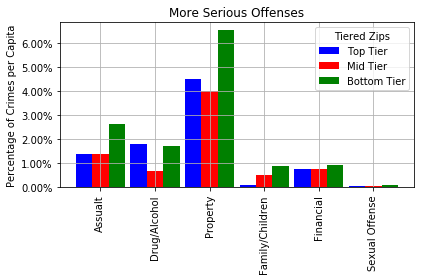

In [6]:
# create bar graph
top = only_danger['Top Tier Per Capita Crimes']
mid = only_danger['Mid Tier Per Capita Crimes']
bottom = only_danger['Bottom Tier Per Capita Crimes']

width=.30
x_axis_top = np.arange(len(top))
x_axis_mid = np.arange(len(mid))
x_axis_bottom = np.arange(len(bottom))
fig, ax = plt.subplots()
plt.bar(x_axis_top, top, color='b', align="center", width = .30, label = "Top Tier" )
plt.bar(x_axis_mid + width, mid, color='r', align="center", width=.30, label = "Mid Tier")
plt.bar(x_axis_bottom + (width*2), bottom, color='g', align="center", width=.30, label = "Bottom Tier")
vals= ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.title("More Serious Offenses")
plt.ylabel("Percentage of Crimes per Capita")
plt.xticks([r + width for r in range(6)], ('Assualt', 'Drug/Alcohol', 'Property', 'Family/Children', 'Financial','Sexual Offense'),rotation=90)
plt.grid()
plt.legend(loc="upper right", title = "Tiered Zips")
plt.tight_layout()
plt.savefig("Images/Dangerous_Crimes_By_Group.png")
plt.show()